<a href="https://colab.research.google.com/github/TAUforPython/neuron-models/blob/master/example%20model%20Hindmarsh-Rose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

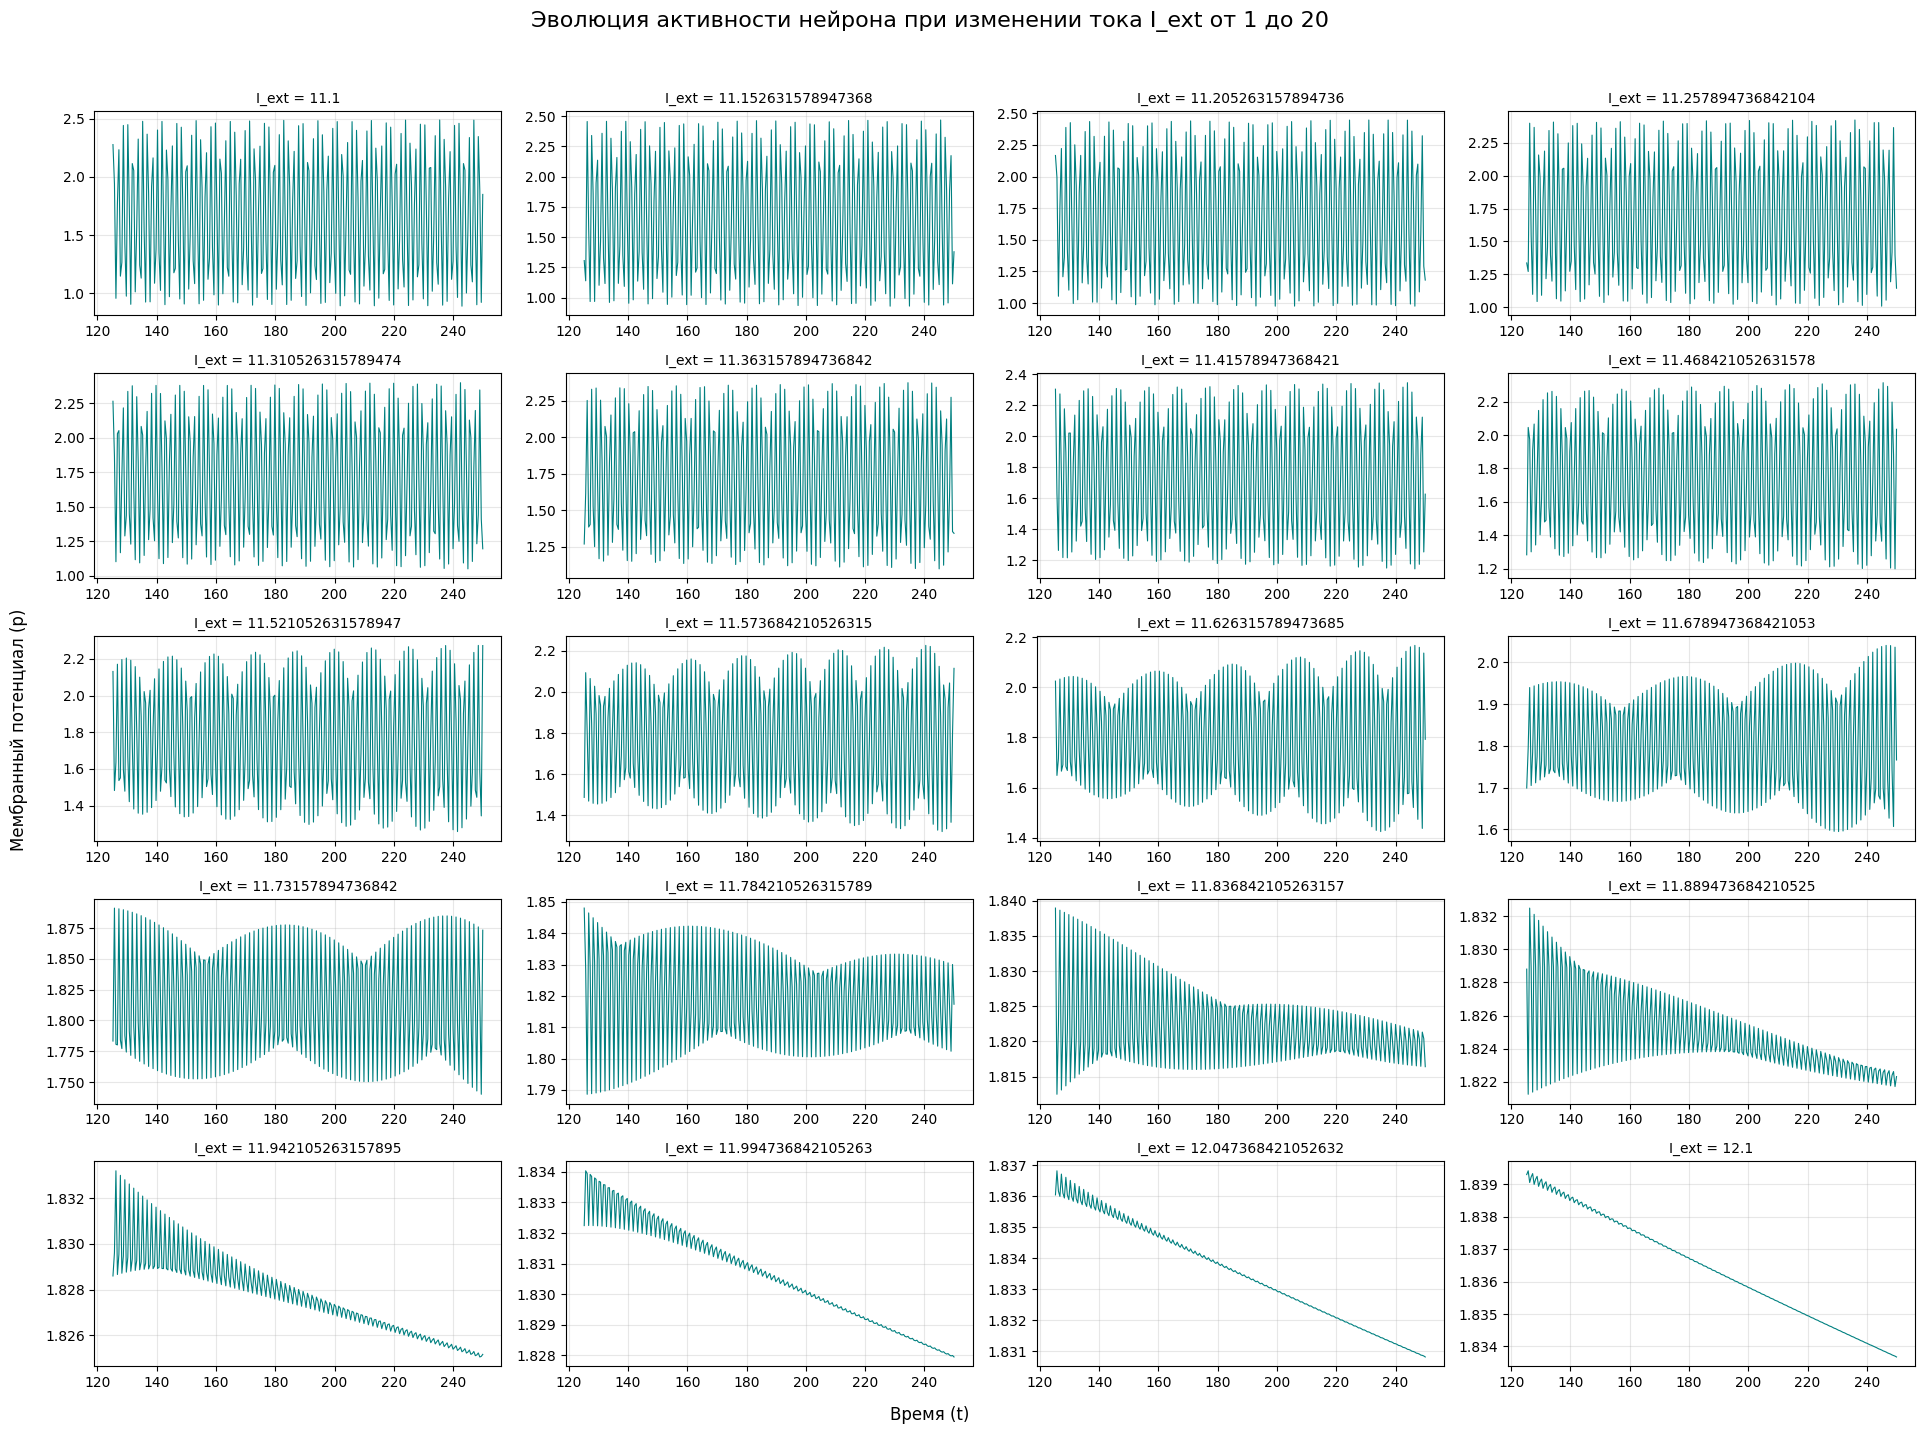

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. Уравнения модели Hindmarsh-Rose
def hindmarsh_rose(state, t, a, b, c, d, r, s, p0, I_ext):
    p, q, n = state
    dp_dt = q - a*p**3 + b*p**2 - n + I_ext
    dq_dt = c - d*p**2 - q
    dn_dt = r * (s * (p + p0) - n)
    return [dp_dt, dq_dt, dn_dt]

# 2. Параметры
a, b, c, d = 1.0, 3.0, 1.0, 5.0
s = 4.0
p0 = -1.6
r = 0.001

# Время моделирования (берем достаточно большой отрезок, чтобы видеть ритм)
t = np.linspace(0, 250, 500)
state0 = [-1, 0, 0]  # Начальное состояние

# 3. Настройка большой фигуры для 20 графиков
# Сетка 5 строк на 4 столбца
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
fig.suptitle('Эволюция активности нейрона при изменении тока I_ext от 1 до 20', fontsize=16)

# Выравниваем массив осей в один список, чтобы удобно итерироваться
axes_flat = axes.flatten()

# 4. Цикл от 1 до 20
for i in range(20):
    tt = np.linspace(11.1,12.1,20)
    current_I = tt[i]  # Ток I будет принимать значения 1, 2, ..., 20
    ax = axes_flat[i]  # Текущий график

    # Решение ОДУ
    sol = odeint(hindmarsh_rose, state0, t, args=(a, b, c, d, r, s, p0, current_I))
    p_trace = sol[:, 0]

    # Отрисовка
    # Рисуем только последние 80% времени, чтобы убрать переходной процесс старта
    start_idx = 250
    ax.plot(t[start_idx:], p_trace[start_idx:], color='teal', lw=0.8)

    ax.set_title(f"I_ext = {current_I}", fontsize=10)
    ax.grid(True, alpha=0.3)
    # Подписи осей теперь видны по умолчанию у всех графиков

# Добавляем общие подписи
fig.text(0.5, 0.04, 'Время (t)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Мембранный потенциал (p)', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])  # Оставляем место для заголовков
plt.show()
